In [2]:
import csv

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

## READ

In [16]:
y_axis = []
x_axis = []
y_progress = 0

with open("encoder.csv", 'rb') as encoder_data:
    reader = csv.reader(encoder_data)
    count = 0
    for row in reader:
        if count % 2 == 1:
            fy = float(row[0])
            y_progress += (fy / 1000000.00)
            x_axis.append(y_progress)
            y_axis.append(fy)
            print fy
        count += 1

# Wheel Circm. == 114mm
# Gear Ratio == 150
# Counts == 12

event_distance_mm = (1 / (150.00 * 12.00)) * 114.00
y_axis = [event_distance_mm / (y_axis[t] / 1000000.00) for t in range(0, len(y_axis))]


17940595.0
2932.0
3109.0
1982.0
2110.0
1755.0
1822.0
1434.0
1943.0
1189.0
1627.0
1393.0
1519.0
1144.0
1547.0
1207.0
1383.0
1239.0
1348.0
1090.0
1540.0
970.0
1357.0
1177.0
1286.0
986.0
1349.0
1054.0
1215.0
1107.0
1203.0
998.0
1403.0
890.0
1259.0
1073.0
1200.0
918.0
1265.0
985.0
1155.0
1036.0
1154.0
951.0
1344.0
850.0
1207.0
1059.0
1172.0
905.0
1222.0
972.0
1126.0
1029.0
1123.0
928.0
1326.0
841.0
1210.0
1028.0
1152.0
885.0
1226.0
955.0
1121.0
1012.0
1128.0
926.0
1314.0
833.0
1191.0
1052.0
1136.0
886.0
1207.0
961.0
1105.0
1015.0
1116.0
929.0
1311.0
828.0
1170.0
1037.0
1141.0
886.0
1200.0
941.0
1106.0
1008.0
1109.0
914.0
1308.0
829.0
1189.0
1014.0
1139.0
880.0
1221.0
946.0
1103.0
8.0
2125.0
927.0
1324.0
831.0
1196.0
1037.0
1149.0
885.0
1214.0
959.0
1104.0
1010.0
1111.0
927.0
1312.0
828.0
1183.0
1037.0
1148.0
886.0
1204.0
958.0
1117.0
1022.0
1109.0
923.0
1313.0
836.0
1193.0
1025.0
1145.0
885.0
1223.0
942.0
1108.0
1013.0
1136.0
931.0
1327.0
835.0
1203.0
1051.0
1167.0
902.0
1231.0
973.0
1118.

## Render Unfiltered Data

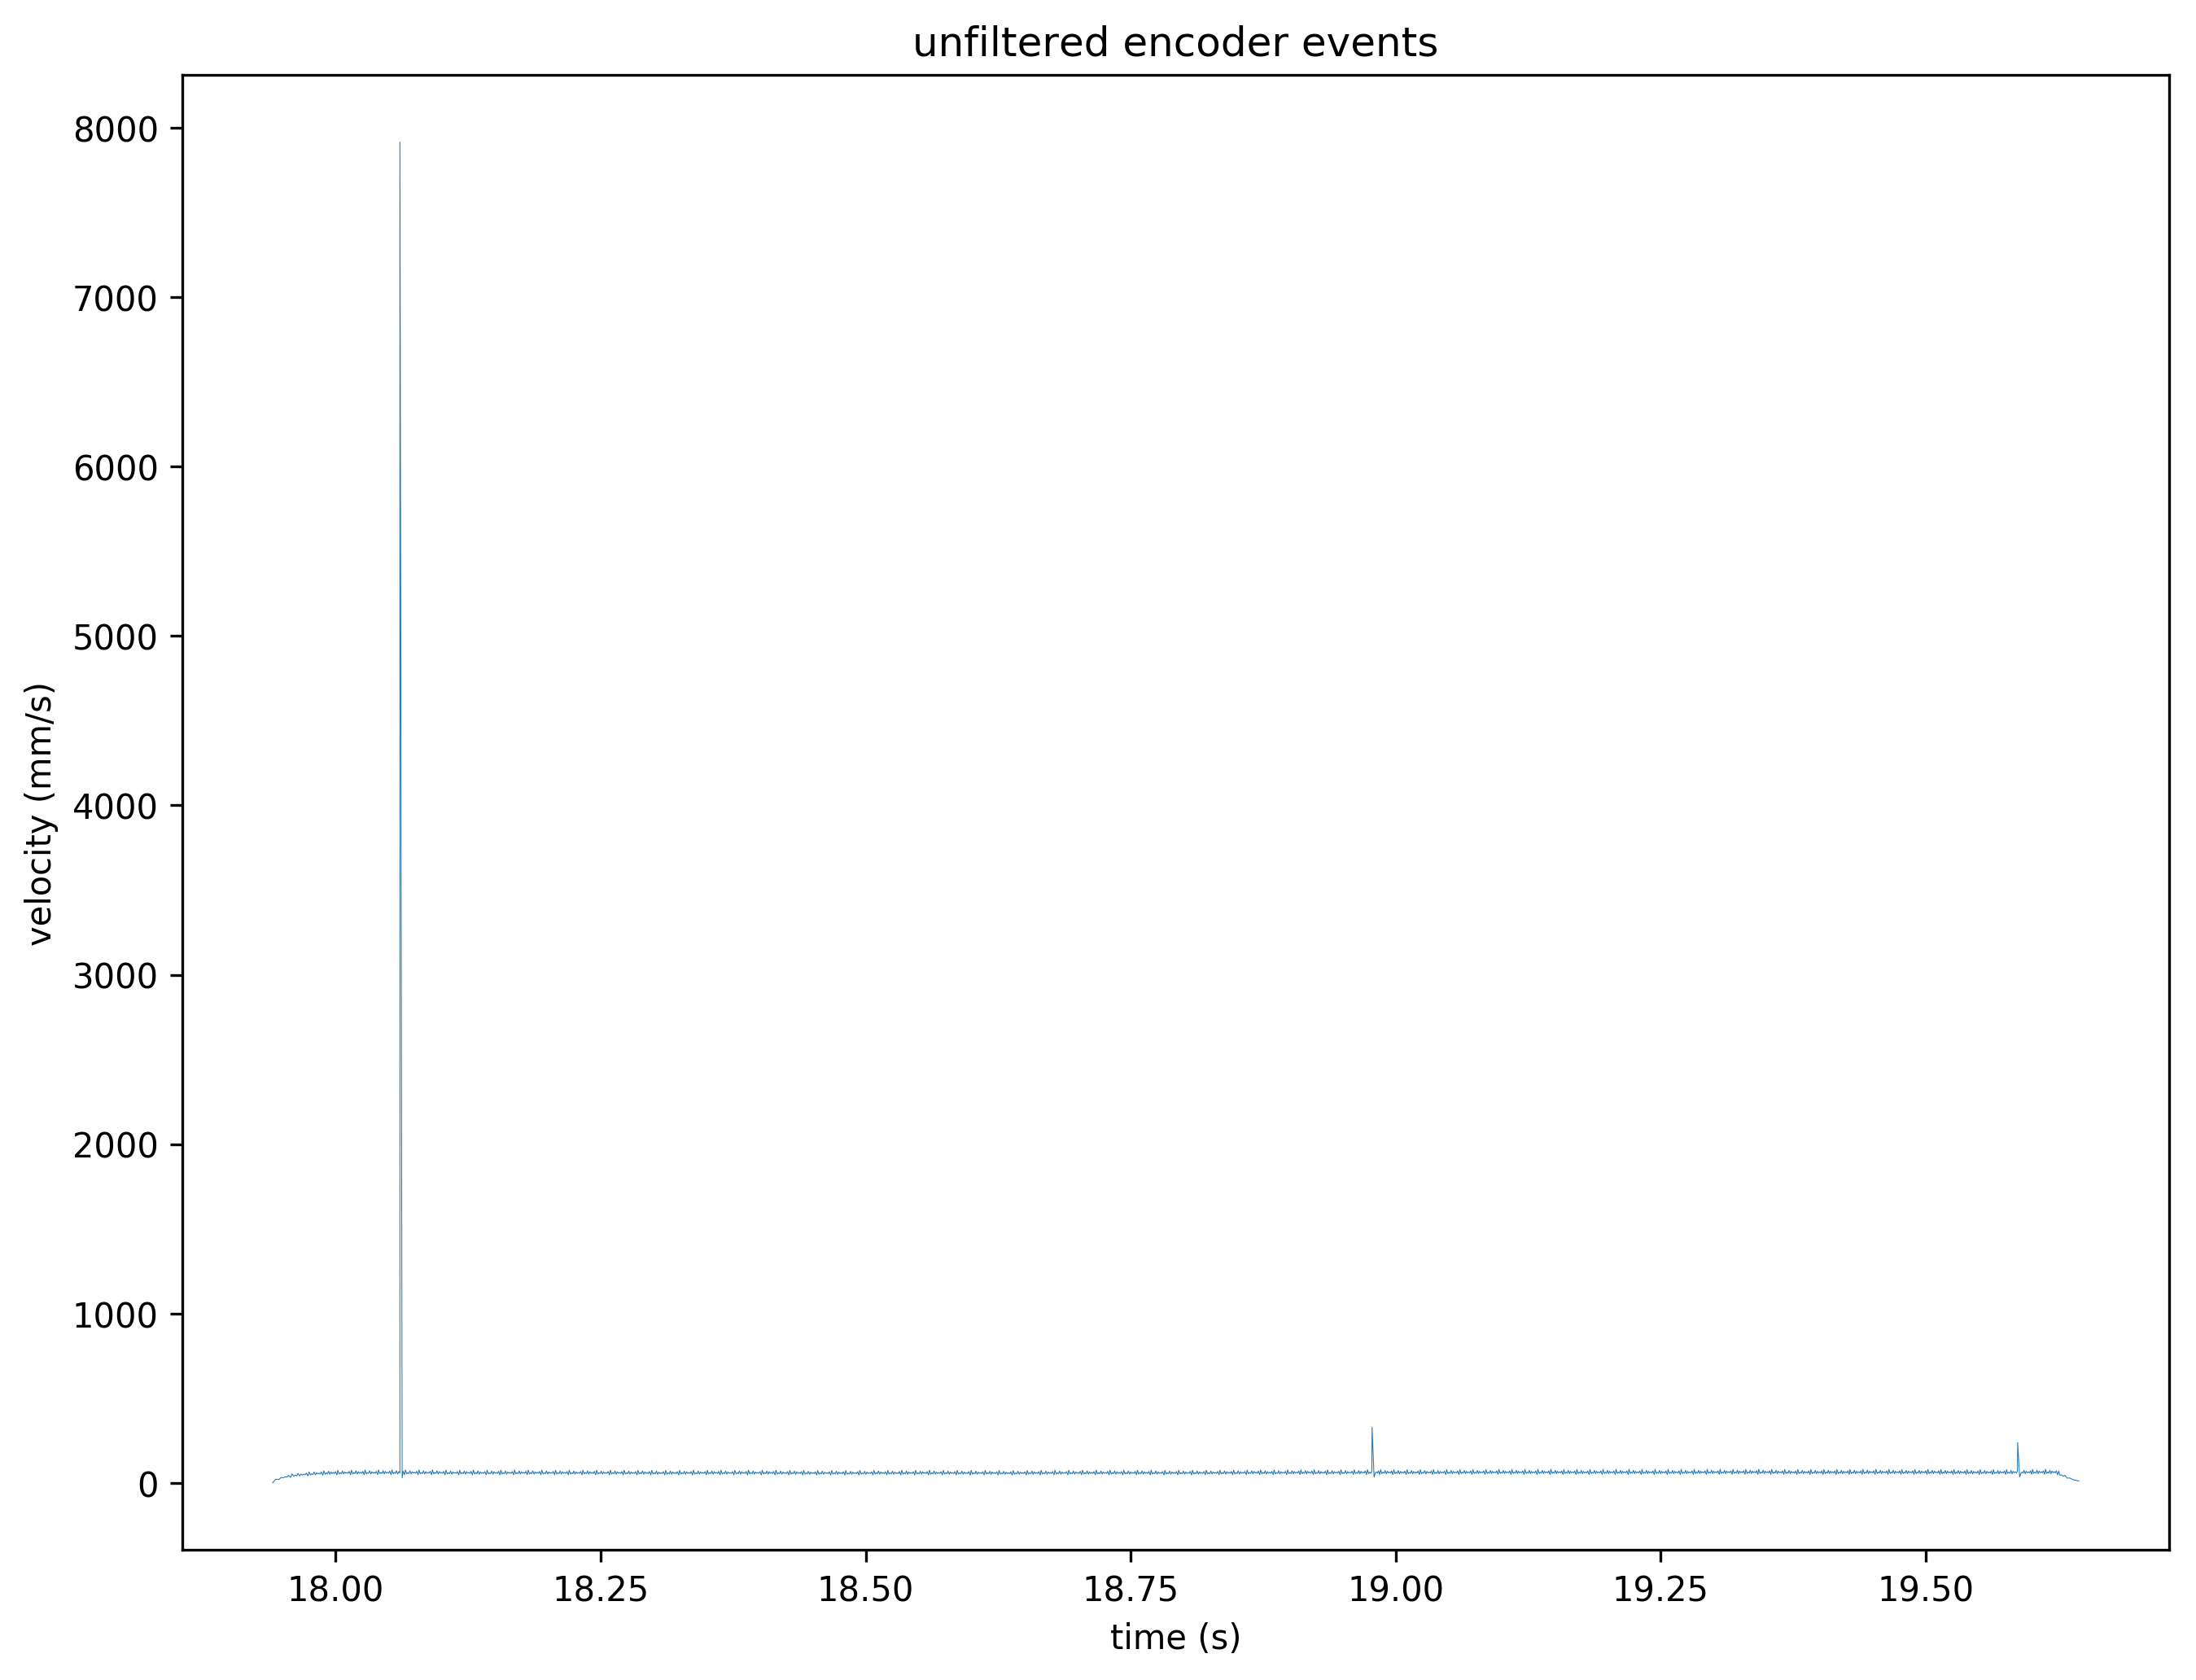

In [17]:
plt.figure(figsize=(10.5, 8), dpi=300)
plt.plot(x_axis, y_axis, linewidth=.25)
plt.title('unfiltered encoder events')
plt.xlabel("time (s)")
plt.ylabel("velocity (mm/s)")
plt.show()

## Typical Signal

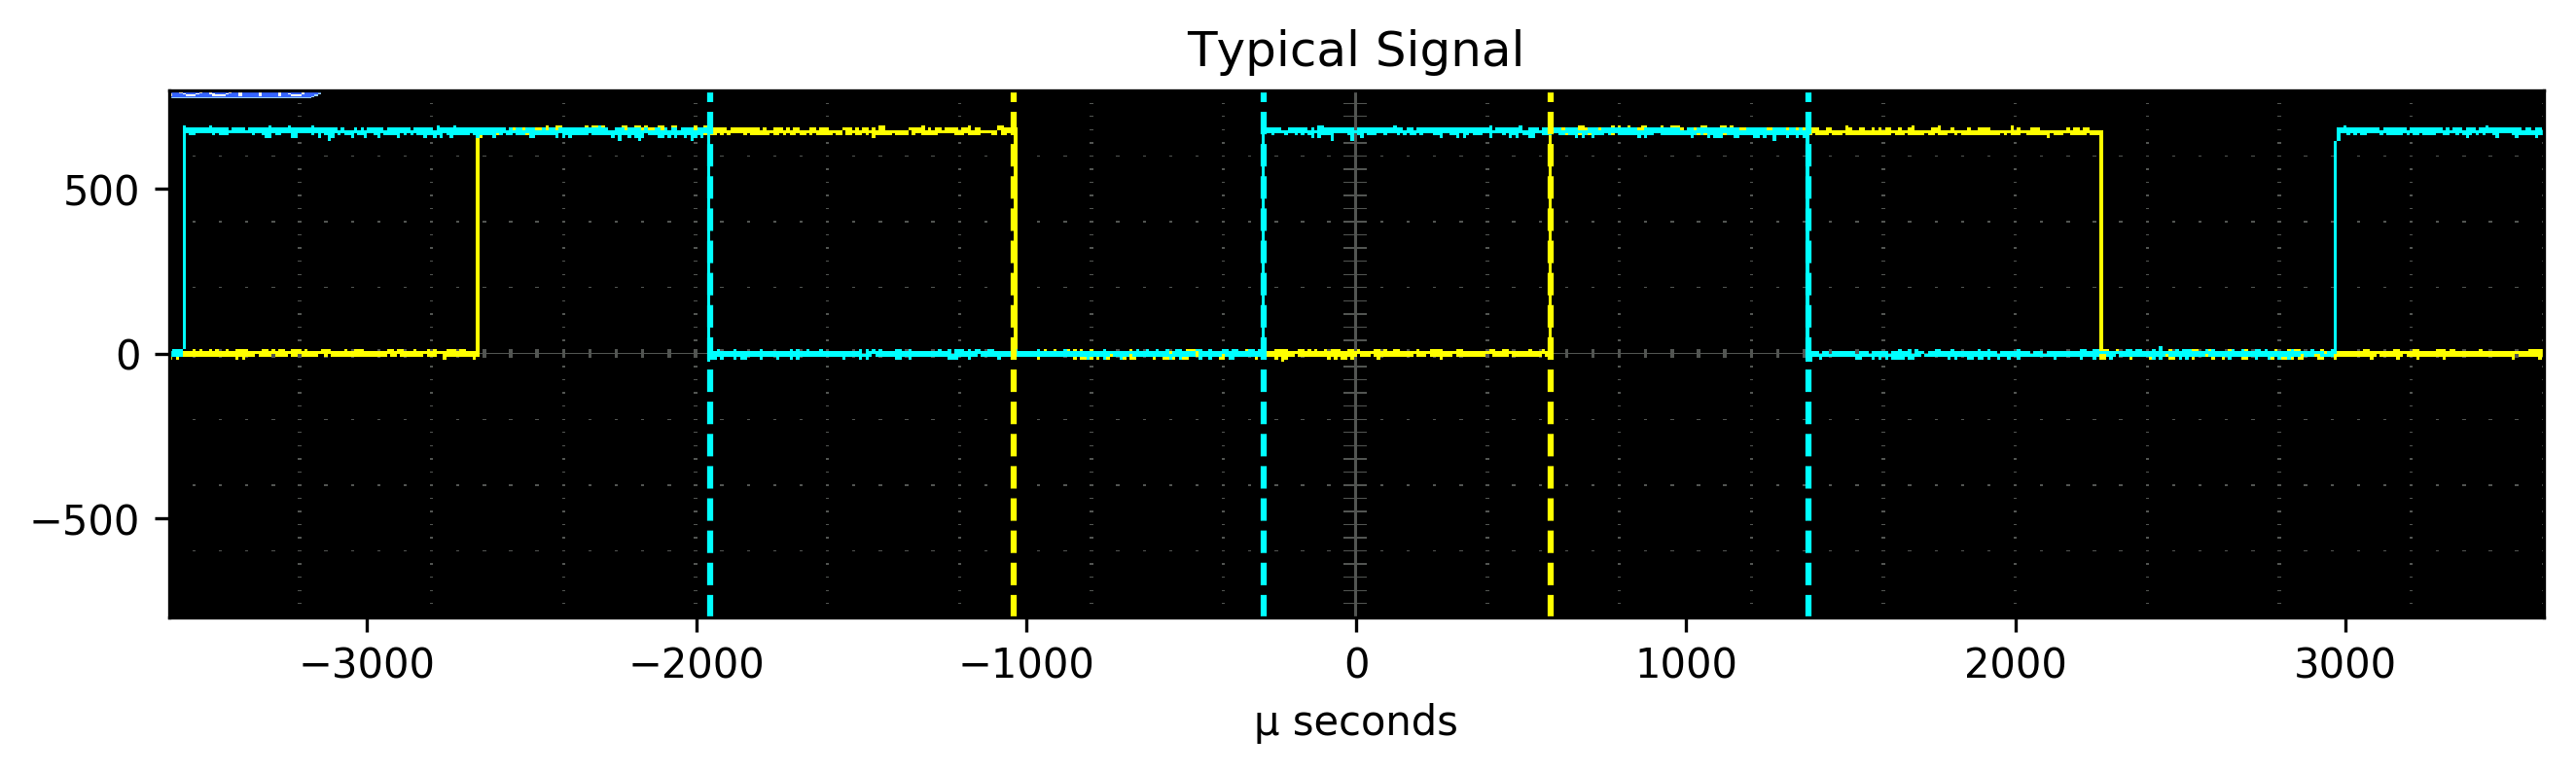

In [51]:
scope_x_tick = 80
left_x = -1960
x_events = [920, 760, 870, 780]
plt.figure(figsize=(10.5, 8), dpi=300)
img = plt.imread("encoder.png")
plt.imshow(img, extent=(-9 * 400,9 * 400,-800,800))
plt.title('Typical Signal')
plt.axvline(x=left_x, color="cyan", linestyle="dashed")
plt.axvline(x=left_x + x_events[0], color="yellow", linestyle="dashed")
plt.axvline(x=left_x + x_events[0] + x_events[1], color="cyan", linestyle="dashed")
plt.axvline(x=left_x + x_events[0] + x_events[1] + x_events[2], color="yellow", linestyle="dashed")
plt.axvline(x=left_x + x_events[0] + x_events[1] + x_events[2] + x_events[3], color="cyan", linestyle="dashed")
plt.xlabel(u"µ seconds")
plt.show()

## Setup Taps

taps sum=1.0


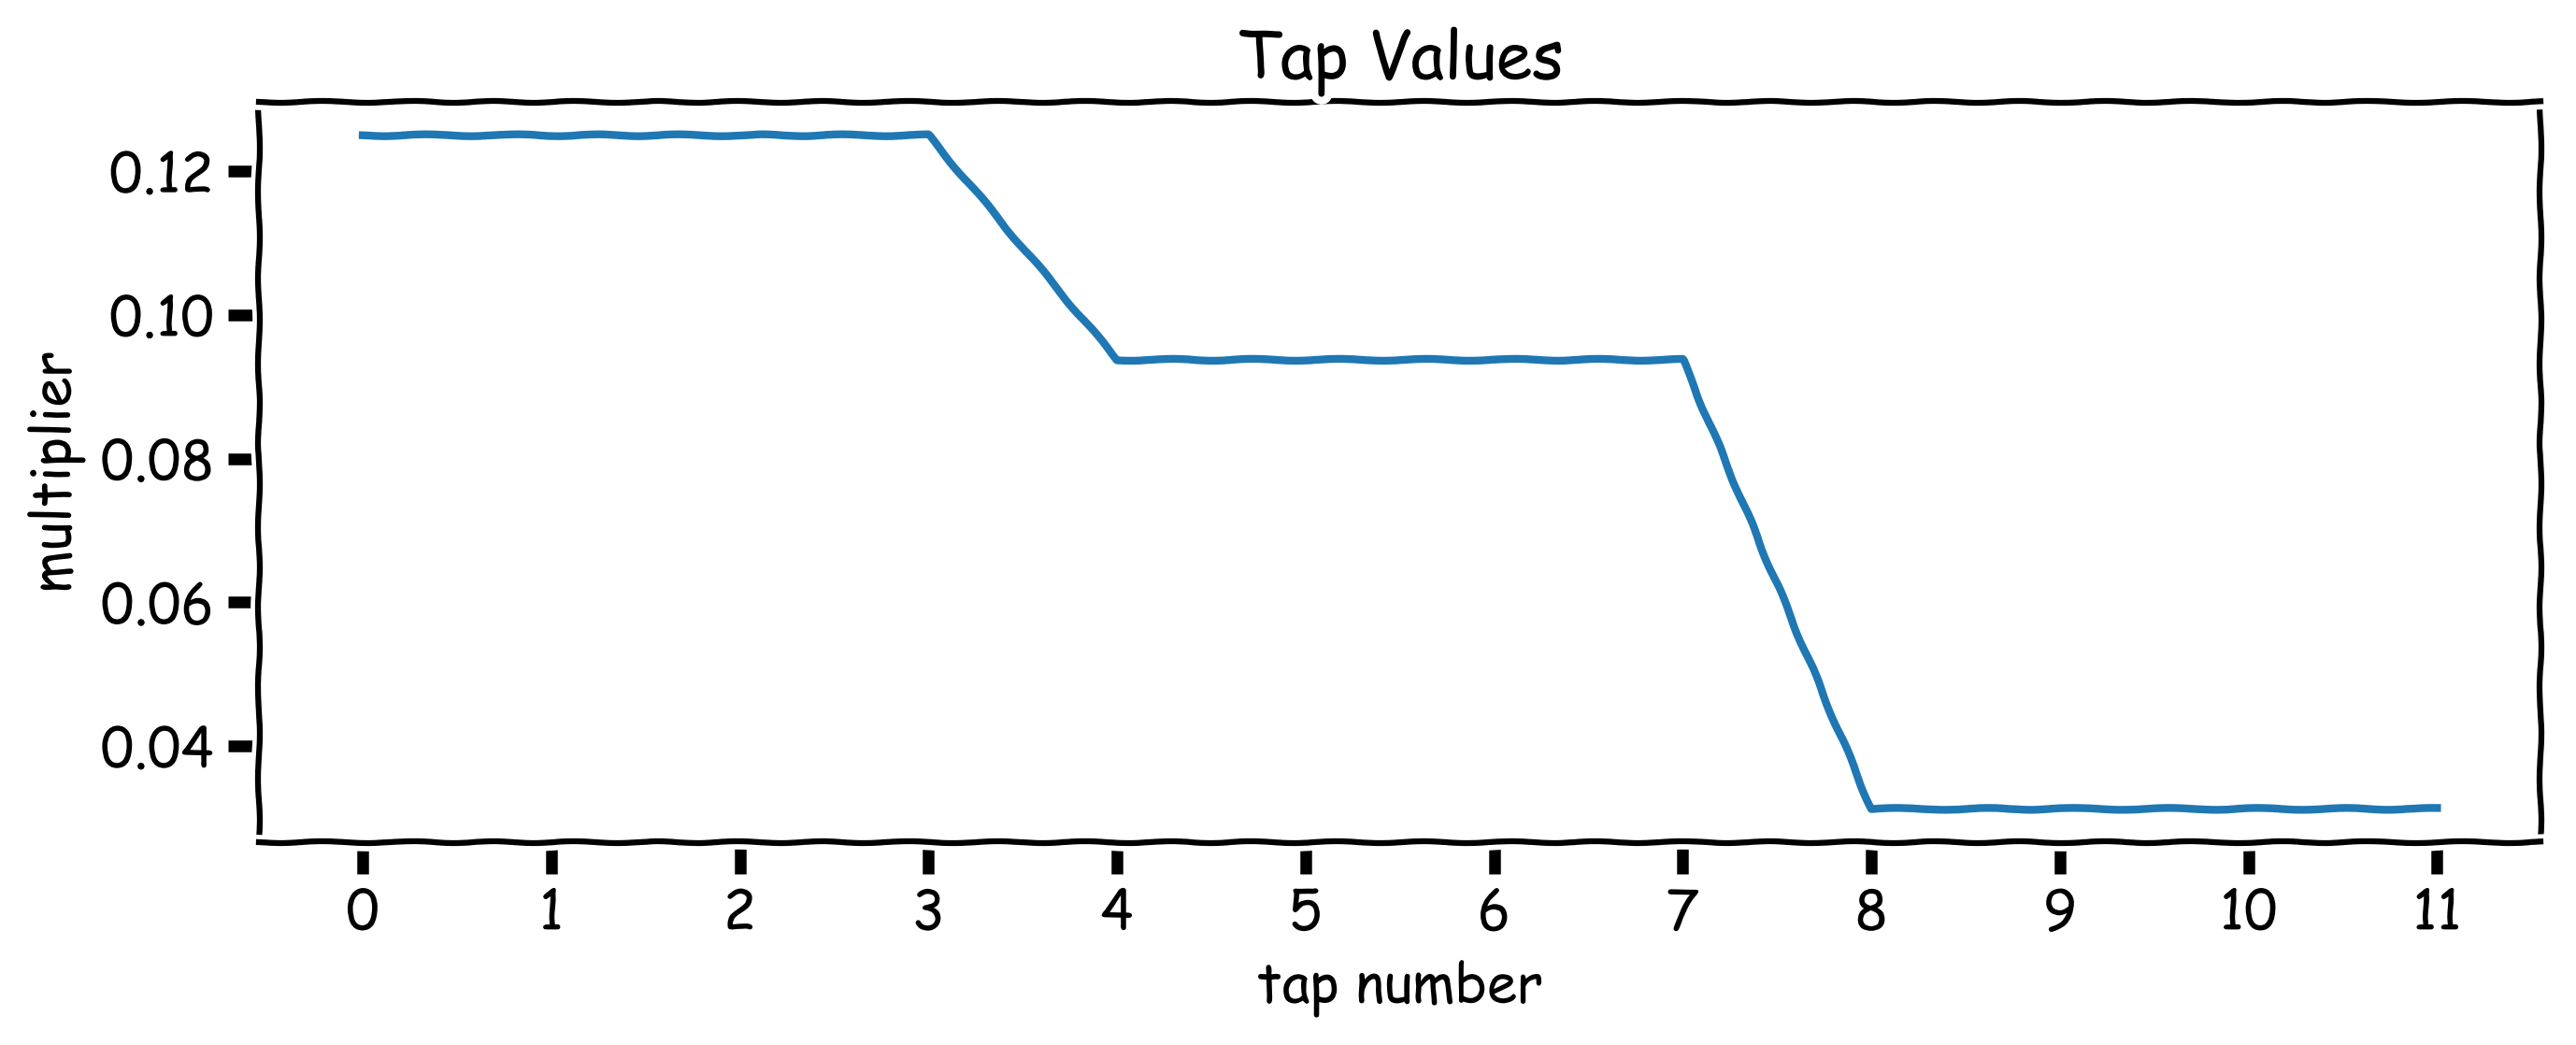

In [3]:

# Taps
a = .50 / 4.00
b = .375 / 4.00
c = .125 / 4.00
taps = [
    a,
    a,
    a,
    a,
    b,
    b,
    b,
    b,
    c,
    c,
    c,
    c,
]

print "taps sum={}".format(sum(taps))

# +--[ Render Taps ]--------------------------------------------------------------#

with plt.xkcd():
    plt.figure(figsize=(10.5, 3.5), dpi=300)
    plt.plot(range(0,len(taps)), taps)
    plt.title('Tap Values')
    plt.xticks(range(0,len(taps)))
    plt.xlabel("tap number")
    plt.ylabel("multiplier")
    plt.show()


## Filter

In [4]:
# Value provider for taps
z = lambda i, data: 0 if i < 0 else data[i]

def ffir(i, data) :
    '''
    len(taps) tap FIR filter
    '''
    return sum([taps[ti] * z(i-ti, data) for ti in range(0, len(taps))])


## Render Filtered Data

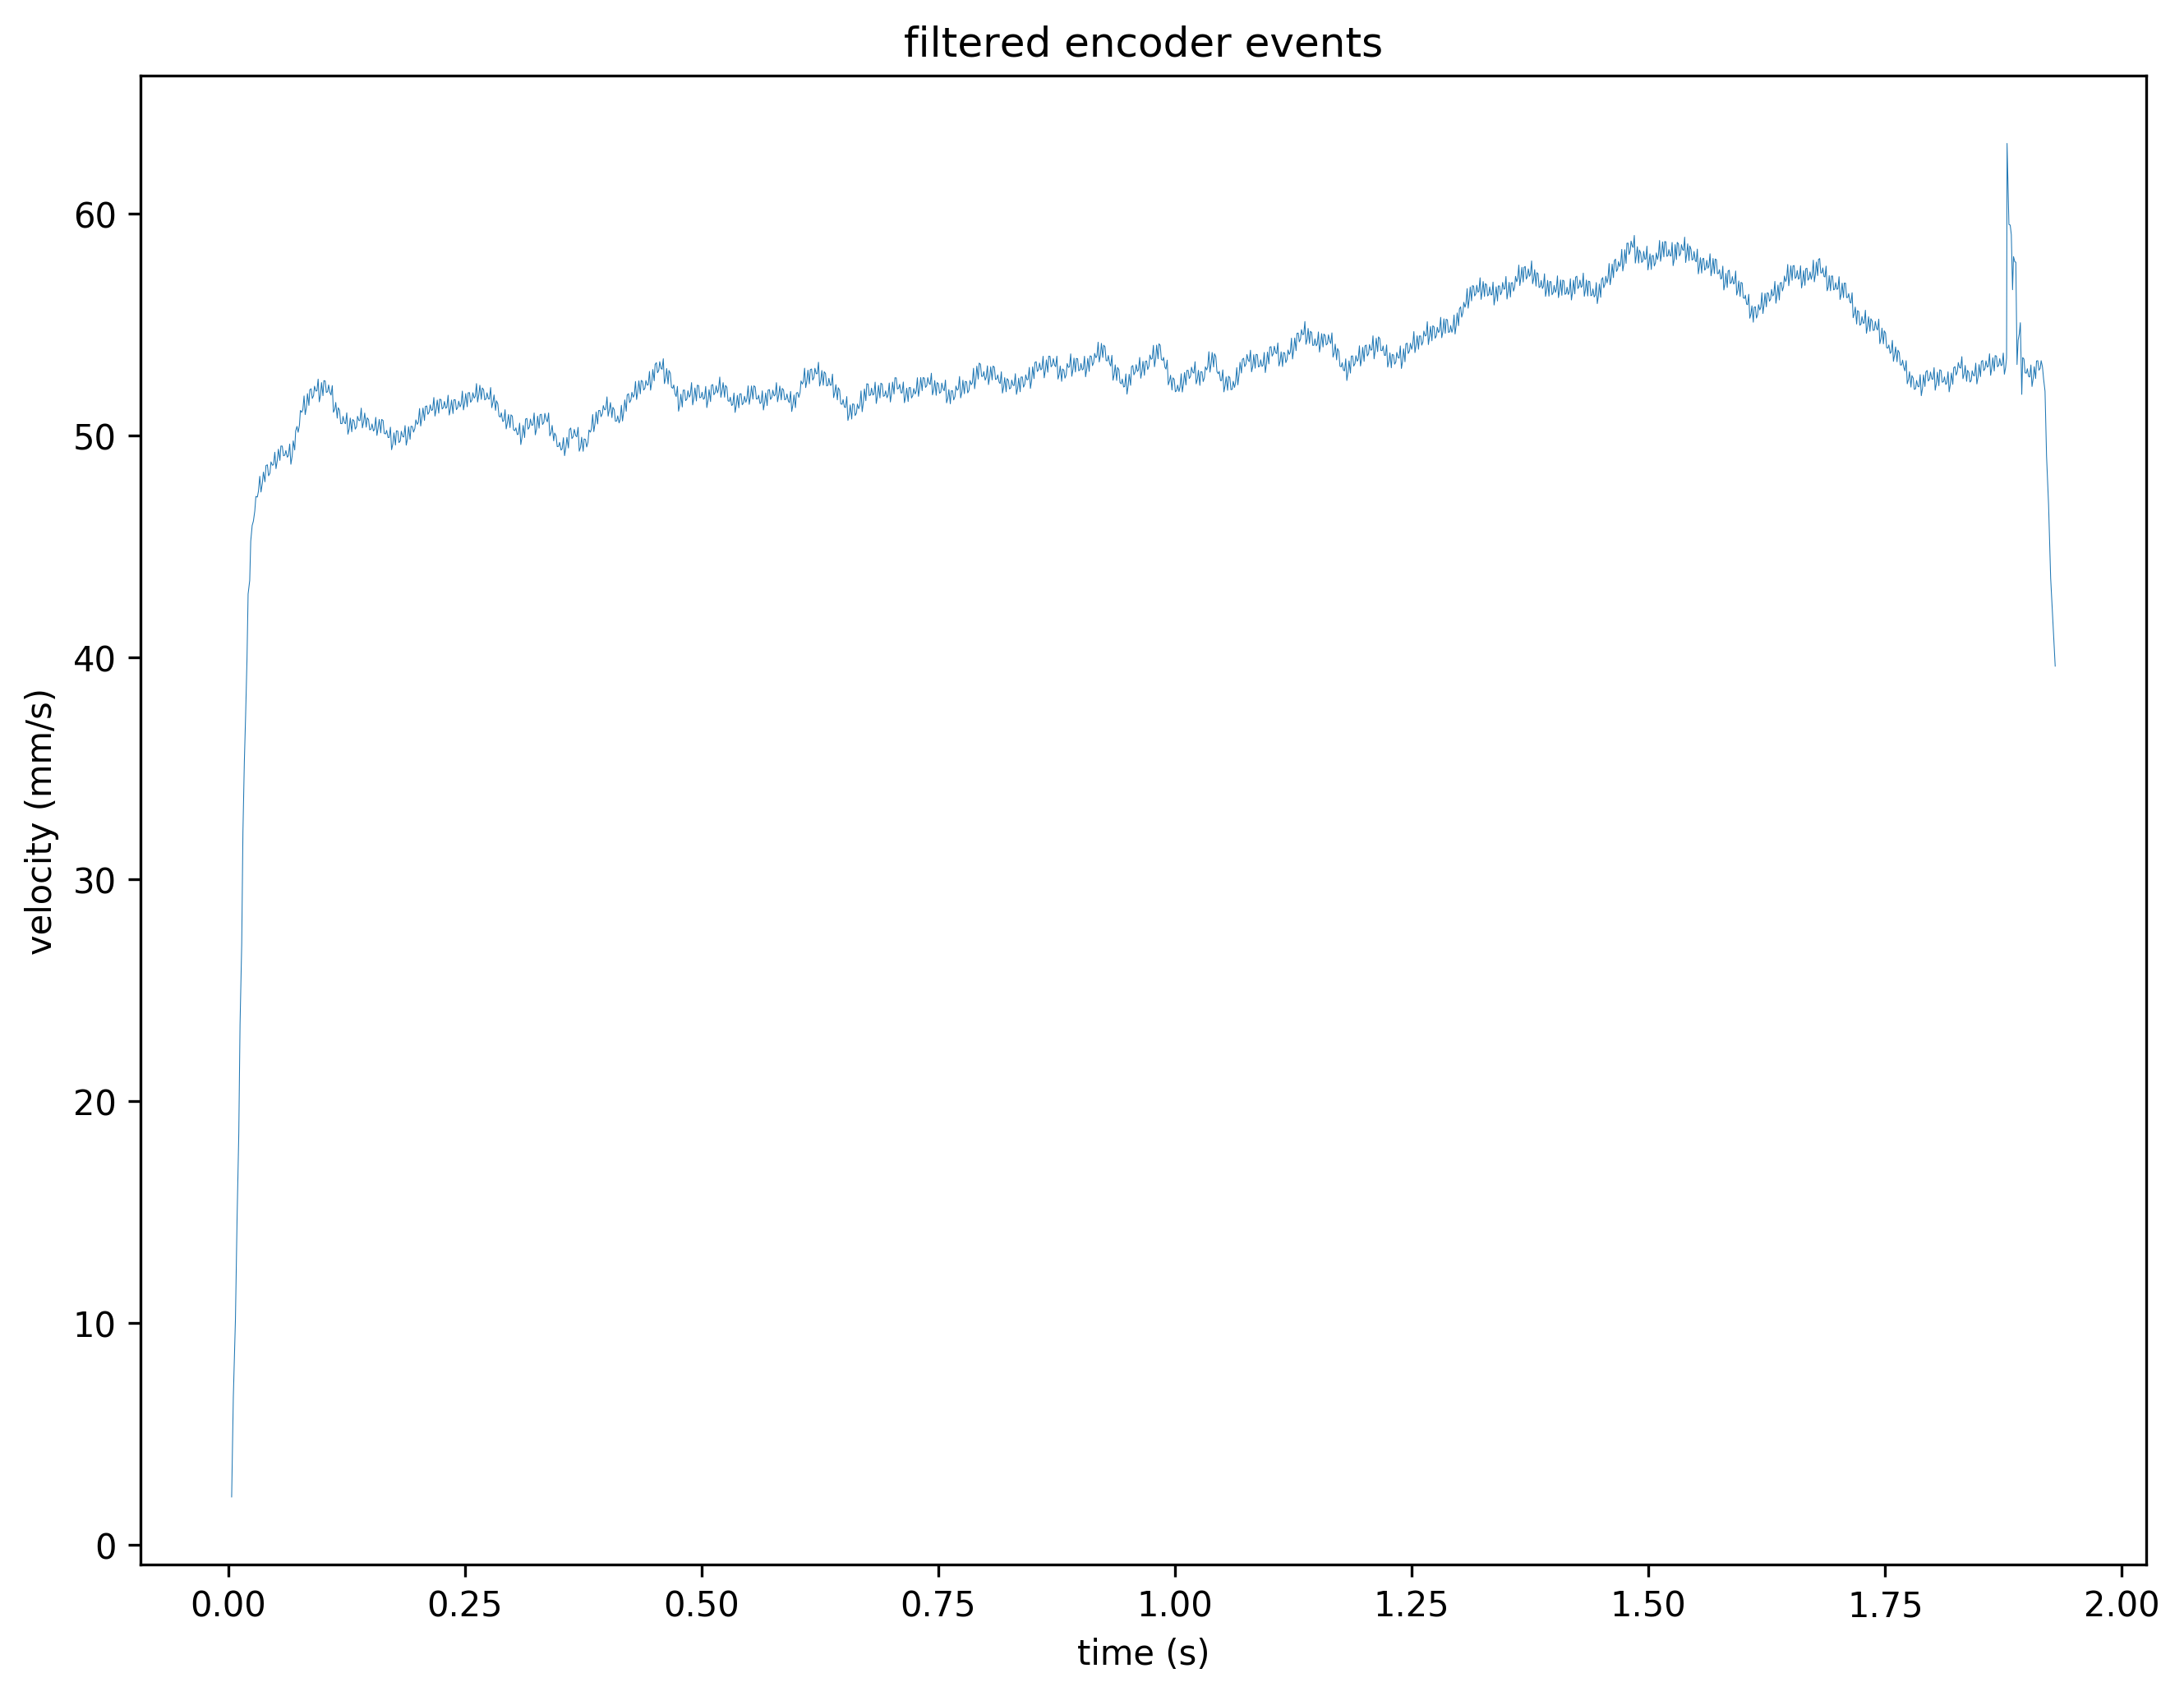

In [54]:
filterd_y = [ ffir(i, y_axis) for i in range(0, len(y_axis)) ]

plt.figure(figsize=(10.5, 8), dpi=300)
plt.plot(x_axis, filterd_y, linewidth=.25)
plt.title('filtered encoder events')
plt.xlabel("time (s)")
plt.ylabel("velocity (mm/s)")
plt.show()


## Integration of Filtered Data

In [60]:
print "{:.2f} cm".format(np.trapz(filterd_y, x_axis)/10.0)

10.21 cm
